# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets

In [6]:
movies=pd.read_csv("/content/movies.csv")
ratings=pd.read_csv("/content/ratings.csv")

In [9]:
movies



,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


# Prepare & Merge Columns of Both Datasets

In [ ]:
try:
    ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
except Exception:
    pass
movie_ratings = ratings.merge(movies, on='movieId', how='left')
print("Merged shape:", movie_ratings.shape)
print(movie_ratings[['userId','movieId','title','rating']].head())


Merged shape: (100836, 6)
   userId  movieId                        title  rating
0       1        1             Toy Story (1995)     4.0
1       1        3      Grumpier Old Men (1995)     4.0
2       1        6                  Heat (1995)     4.0
3       1       47  Seven (a.k.a. Se7en) (1995)     5.0
4       1       50   Usual Suspects, The (1995)     5.0


# Task 1 — Most popular movies (by average rating)

In [ ]:
# Compute avg rating and rating count per movieId
movie_stats = (
    movie_ratings
    .groupby(['movieId','title'])['rating']
    .agg(['mean','count'])
    .reset_index()
    .rename(columns={'mean':'avg_rating','count':'num_ratings'})
)
min_ratings = 50
popular_movies = movie_stats[movie_stats['num_ratings'] >= min_ratings]
top_n = 20
top_movies = popular_movies.sort_values('avg_rating', ascending=False).head(top_n)
top_movies.reset_index(drop=True, inplace=True)
print(top_movies[['movieId','title','avg_rating','num_ratings']].head(20))


    movieId                                              title  avg_rating  \
0       318                   Shawshank Redemption, The (1994)    4.429022   
1       858                              Godfather, The (1972)    4.289062   
2      2959                                  Fight Club (1999)    4.272936   
3      1276                              Cool Hand Luke (1967)    4.271930   
4       750  Dr. Strangelove or: How I Learned to Stop Worr...    4.268041   
5       904                                 Rear Window (1954)    4.261905   
6      1221                     Godfather: Part II, The (1974)    4.259690   
7     48516                               Departed, The (2006)    4.252336   
8      1213                                  Goodfellas (1990)    4.250000   
9       912                                  Casablanca (1942)    4.240000   
10    58559                            Dark Knight, The (2008)    4.238255   
11       50                         Usual Suspects, The (1995)  

# Task 2 — Group by genre & visualize count of movies per genre

In [ ]:
genre_count = movies_exploded['genre'].value_counts().reset_index()
genre_count.columns = ['genre','count']
print(genre_count)

                 genre  count
0                Drama   4361
1               Comedy   3756
2             Thriller   1894
3               Action   1828
4              Romance   1596
5            Adventure   1263
6                Crime   1199
7               Sci-Fi    980
8               Horror    978
9              Fantasy    779
10            Children    664
11           Animation    611
12             Mystery    573
13         Documentary    440
14                 War    382
15             Musical    334
16             Western    167
17                IMAX    158
18           Film-Noir     87
19  (no genres listed)     34


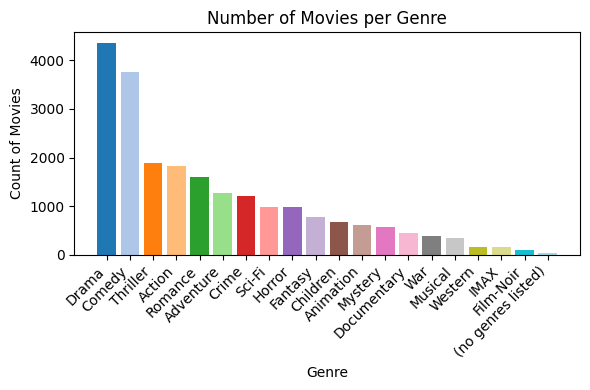

<Figure size 640x480 with 0 Axes>

In [ ]:
colors = plt.cm.tab20(np.linspace(0, 1, len(genre_count)))

plt.figure(figsize=(6,4))
plt.bar(genre_count['genre'], genre_count['count'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Count of Movies')
plt.tight_layout()
plt.show()

plt.savefig('movies_per_genre.png', dpi=300, bbox_inches='tight')


# Task 3 — Recommend top-rated movies in a specific genre

In [ ]:

def recommend_by_genre(genre, min_ratings=50, top_n=10):
    genre_movies = movies_exploded[movies_exploded['genre'].str.lower() == genre.lower()]

    genre_with_stats = genre_movies.merge(movie_stats, on=['movieId','title'], how='left')
    genre_with_stats = genre_with_stats.dropna(subset=['avg_rating'])
    genre_top = genre_with_stats[genre_with_stats['num_ratings'] >= min_ratings]
    genre_top = genre_top.sort_values('avg_rating', ascending=False).drop_duplicates(subset=['movieId'])
    return genre_top[['movieId','title','avg_rating','num_ratings']].head(top_n)
print(recommend_by_genre('Comedy', min_ratings=50, top_n=10))


      movieId                                              title  avg_rating  \
230       750  Dr. Strangelove or: How I Learned to Stop Worr...    4.268041   
332      1197                         Princess Bride, The (1987)    4.232394   
94        296                                Pulp Fiction (1994)    4.197068   
1353     4973  Amelie (Fabuleux destin d'Amélie Poulain, Le) ...    4.183333   
115       356                                Forrest Gump (1994)    4.164134   
320      1136             Monty Python and the Holy Grail (1975)    4.161765   
1087     4011                                      Snatch (2000)    4.155914   
629      2324         Life Is Beautiful (La Vita è bella) (1997)    4.147727   
197       608                                       Fargo (1996)    4.116022   
2791    78499                                 Toy Story 3 (2010)    4.109091   

      num_ratings  
230          97.0  
332         142.0  
94          307.0  
1353        120.0  
115         329.0  

# Distribution of Ratings (Histogram)

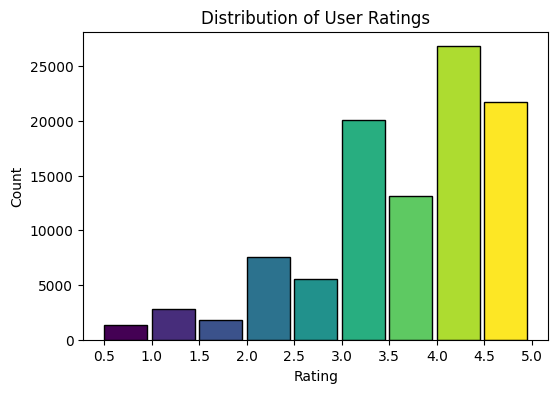

In [ ]:

bins = np.arange(0.5, 5.5, 0.5)  # 0.5 to 5.0 with step 0.5
counts, edges = np.histogram(ratings['rating'], bins=bins)

colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))
plt.figure(figsize=(6,4))
for i in range(len(counts)):
    plt.bar(edges[i], counts[i], width=0.45, color=colors[i], edgecolor='black', align='edge')

plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(bins)
plt.show()


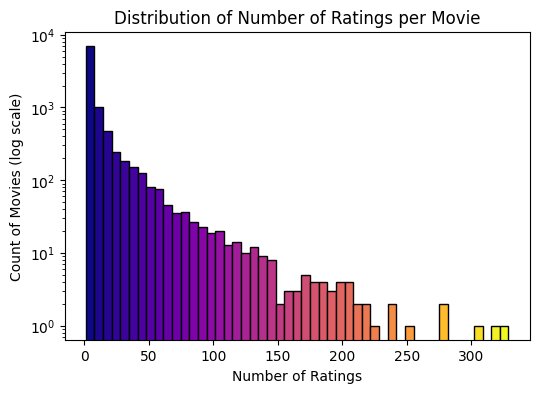

In [ ]:
bins = np.linspace(movie_stats['num_ratings'].min(), movie_stats['num_ratings'].max(), 50)
counts, edges = np.histogram(movie_stats['num_ratings'], bins=bins)
colors = plt.cm.plasma(np.linspace(0, 1, len(counts)))
plt.figure(figsize=(6,4))
for i in range(len(counts)):
    plt.bar(edges[i], counts[i], width=edges[1]-edges[0], color=colors[i],
            edgecolor='black', align='edge')
plt.yscale('log')
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Movies (log scale)')
plt.show()

# Horizontal Bar Chart with Multiple Colors and Value Labels

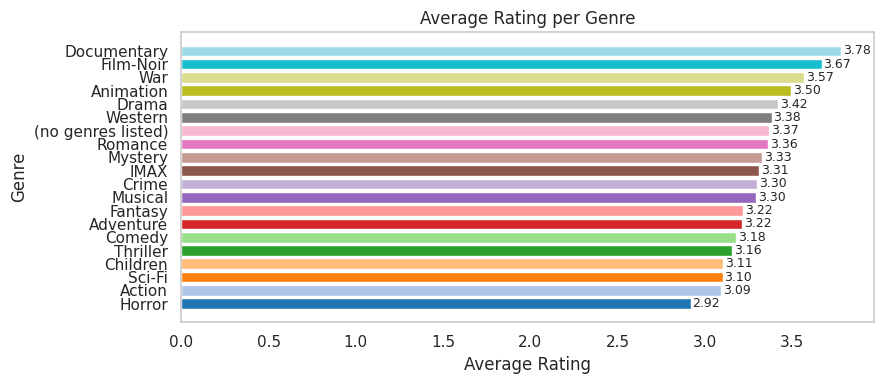

In [ ]:

genre_avg_sorted = genre_avg.sort_values()
colors = plt.cm.tab20(np.linspace(0,1,len(genre_avg_sorted)))
plt.figure(figsize=(9,4))
bars = plt.barh(genre_avg_sorted.index, genre_avg_sorted.values, color=colors)
plt.grid(False)  # remove grid
plt.gca().set_facecolor('white')
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center', fontsize=9)

plt.title('Average Rating per Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

